In [1]:
import train as train
import generate
import eval
from modules.config import read_config

import modules.plots as plots
import torch
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIR = "./experiments/model-test/"
NAME = "one-layer-sum"

In [30]:
# Get all models
subfolders = [ f.name for f in os.scandir(f"{DIR}/models") if f.is_dir() ]
#Import train stats and results
stats = {}
for f in subfolders:
    with open(f"{DIR}/models/{f}/train_stats.json", "r") as file:
        stats[f] = json.load(file)


# Get all results
subfolders = [ f.name for f in os.scandir(f"{DIR}/results") if f.is_dir() ]
res = {}
for f in subfolders:
    with open(f"{DIR}/results/{f}/results.json", "r") as file:
        res[f] = json.load(file)


names1 = ["no-layer-sum", "one-layer-sum", "two-layer-sum", "three-layer-sum", "four-layer-sum", "five-layer-sum"]
names2 = ["no-layer-sin", "one-layer-sin", "two-layer-sin", "three-layer-sin", "four-layer-sin", "five-layer-sin"]



In [31]:
print(stats.keys())
print(stats[NAME].keys())


dict_keys(['four-layer-sum', 'three-layer-sum', 'five-layer-sin', 'five-layer-sum', 'two-layer-sum', 'two-layer-sin', 'one-layer-sin', 'three-layer-sin', 'one-layer-sum', 'no-layer-sum', 'no-layer-sin', 'four-layer-sin'])
dict_keys(['elbo_minibatch', 'elbo_epoch', 'train_rmse', 'time'])


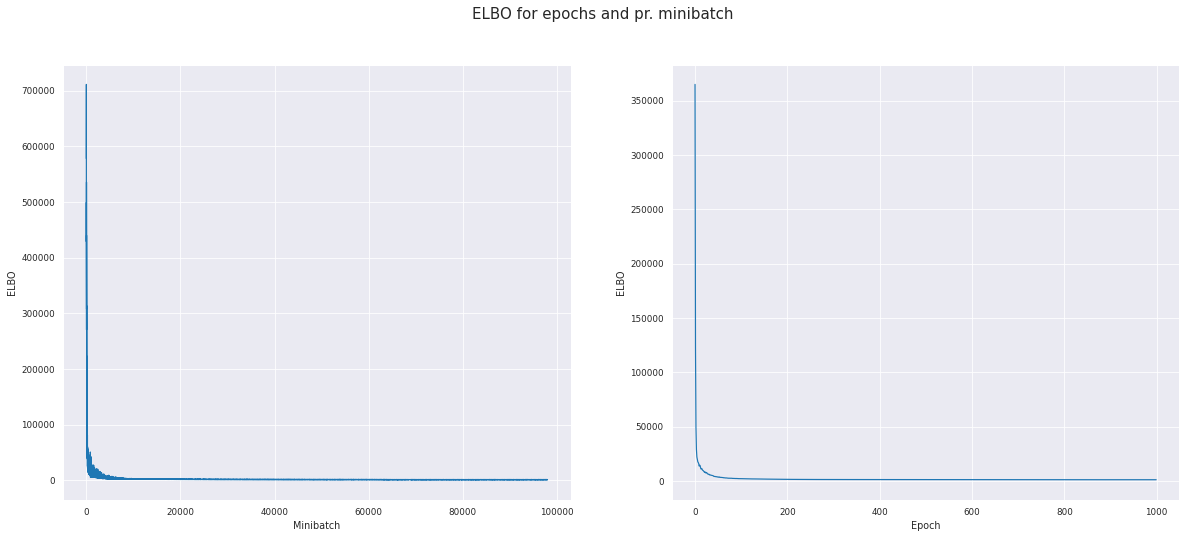

In [32]:
model_stats = stats[NAME]
plots.plot_elbo(model_stats)

In [33]:
### RMSE

In [34]:
def compare_models(stats, names, metric="train_rmse", fig_size=(10, 8)):
    rmse = [stats[k][metric] for k in names]

    sns.set_style("darkgrid")
    sns.set_context("paper")

    fig, ax = plt.subplots(figsize=fig_size)
    sns.lineplot(
    x=names, y=rmse, marker="o", ax=ax)
    plt.show()
    
        

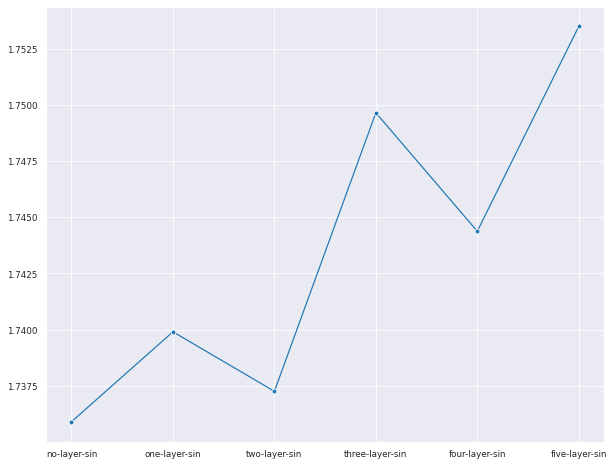

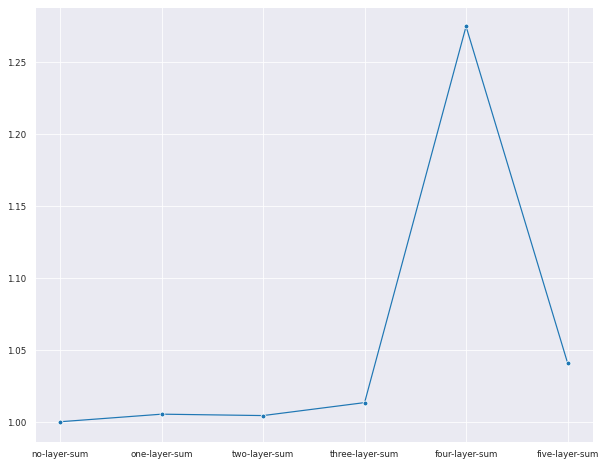

In [35]:
compare_rmse(stats, names2)
compare_rmse(stats, names1)

In [36]:
### KL Divergence